# API-201 ABC REVIEW SESSION #6

**Friday, October 21**

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture recap

xx sampling distribution
xx confidence intervals

# Exercise 1: Survey of macroeconomic expectations

Many central banks conduct surveys to gather people's expectations about the economy. In these surveys, consumers, firms, or professional forecasters are asked about their expecations for the future performance of the economy.

Imagine that we had data on the latest survey conducted to key stakeholders of a subset of representatitve firms of the US economy. In this survey, firms were asked about the level of GDP growth, inflation, and unemployment that they expected for next year.

In [419]:
# Data setup
library(tidyverse)
set.seed(101)
expectations_data <- tibble(
    firm = 1:10000,
    inflation_past = round(rnorm(10000,8.5,1.9),2),    
    gdp_growth = round(rnorm(10000,2,1),2))
expectations_data <- expectations_data %>%
    mutate(
      inflation = round(rnorm(10000,2,2) + 0.72 * inflation_past + gdp_growth/max(gdp_growth),2),
    unemployment_rate = round(rnorm(10000,4,0.5)-gdp_growth/10,2),
    sector = ifelse(gdp_growth<0.25 | gdp_growth>4.5,"construction",ifelse(gdp_growth<1.5,"manufacturing",ifelse(gdp_growth<2,"agriculture","services"))))

**1. What is the average inflation level that firms expect for next year? Report the mean and the standard deviation of expected inflation, and create a graph that represents its distribution.**

mean,sd
<dbl>,<dbl>
8.449048,2.417116


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



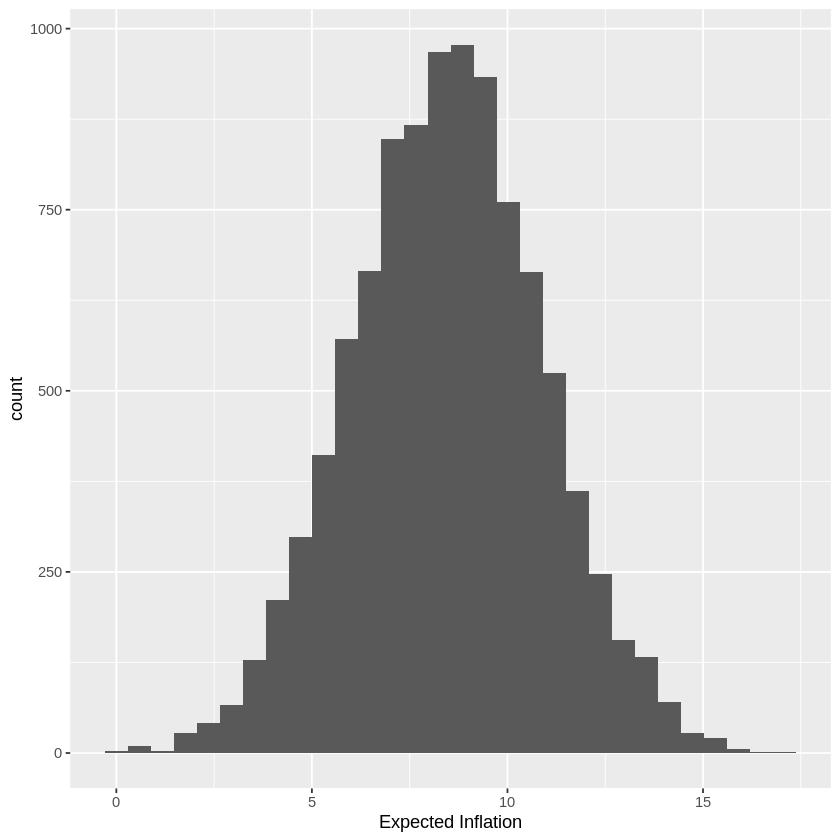

In [439]:
# Your answer here!

# START
expectations_data %>%
  summarize(mean = mean(inflation), sd = sd(inflation))

ggplot(expectations_data) +
  geom_histogram(aes(x = inflation)) +
  labs(x="Expected Inflation")
# END

**2. Some studies suggest that people have sticky expectations about the macroeconomy. In other words, people form their expectations over future economic variables based on their past forecasts, and they revise their expectations slowly. The variable `inflation_past` contains firm's past inflation expectations. Use a graph and correlations to determine whether this theory holds in the data.**

`geom_smooth()` using formula 'y ~ x'



[1] 0.5652985

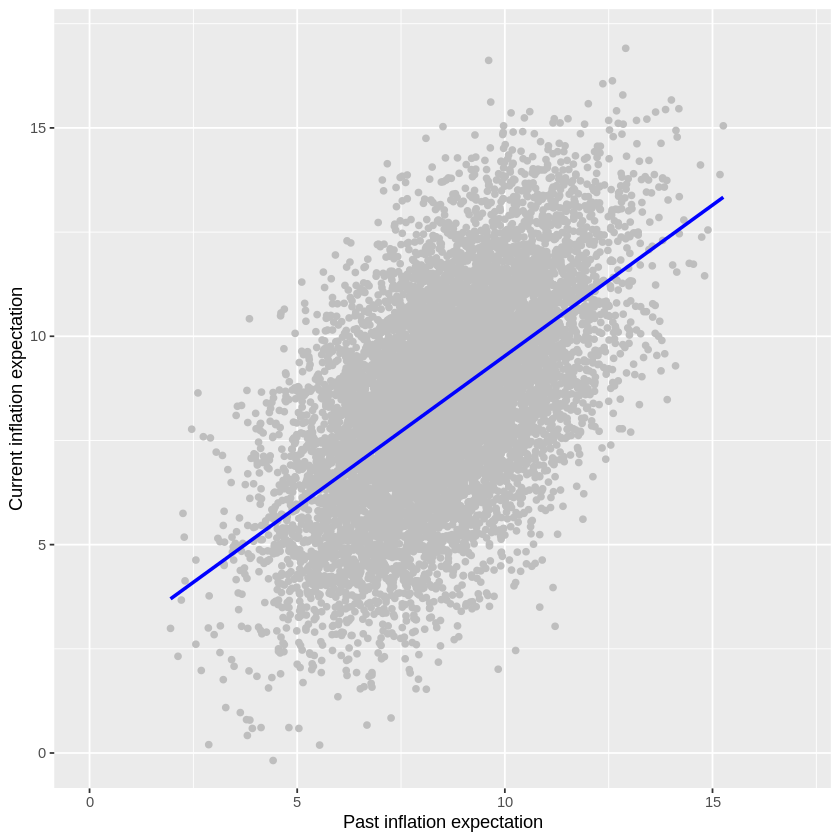

In [511]:
# Your answer here!

# START

ggplot(data = expectations_data, aes(x = inflation_past, y = inflation)) + 
  geom_point(color='gray') +
  geom_smooth(method = "lm",color='blue',se=FALSE) +
  labs(x = 'Past inflation expectation', y = 'Current inflation expectation') +
  coord_cartesian(xlim = c(0, 17), ylim = c(0,17)) 

cor(expectations_data$inflation_past,expectations_data$inflation)

# Also works:
# ggplot(expectations_data) +
# geom_point(aes(x=inflation_past,y=inflation),color='gray') +
# geom_smooth(aes(x=inflation_past,y=inflation),color='blue',method="lm") +
# labs(x = 'Past inflation expectation',
# y = 'Current inflation expectation')

# END


**3. In economics, the Okun's Law describes the empirical observed relationship between unemployment and loses in output. In specific, we observe that an increase in the unemployment rate tends to be associated with negative growth in GDP. Use a graph and correlations to determine whether this  holds for firms' expecations.**

`geom_smooth()` using formula 'y ~ x'



[1] -0.1990971

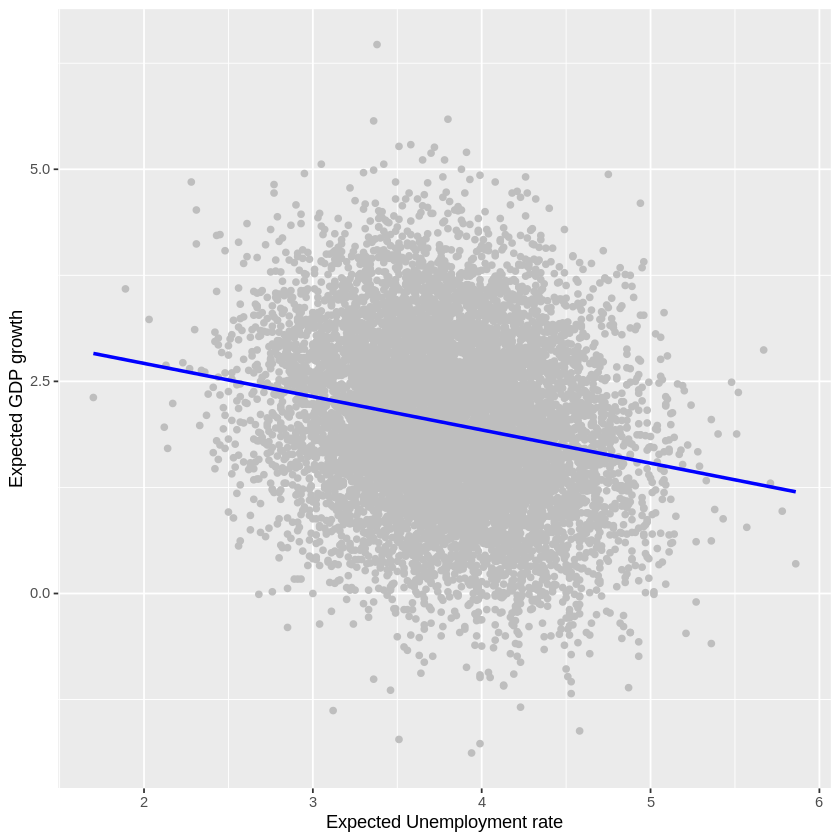

In [516]:
# Your answer here!

# START

ggplot(data = expectations_data, aes(x = unemployment_rate, y = gdp_growth)) + 
  geom_point(color='gray') +
  geom_smooth(method = "lm",color='blue',se=FALSE) +
  labs(x = 'Expected Unemployment rate', y = 'Expected GDP growth') 

cor(expectations_data$unemployment_rate,expectations_data$gdp_growth)

# END

**4. Calculate the expected GDP growth rate by sector. Plot your results.**

# A tibble: 4 × 2
  sector        av_gdp_growth
  <chr>                 <dbl>
1 agriculture           1.75 
2 construction          0.554
3 manufacturing         1.01 
4 services              2.79 


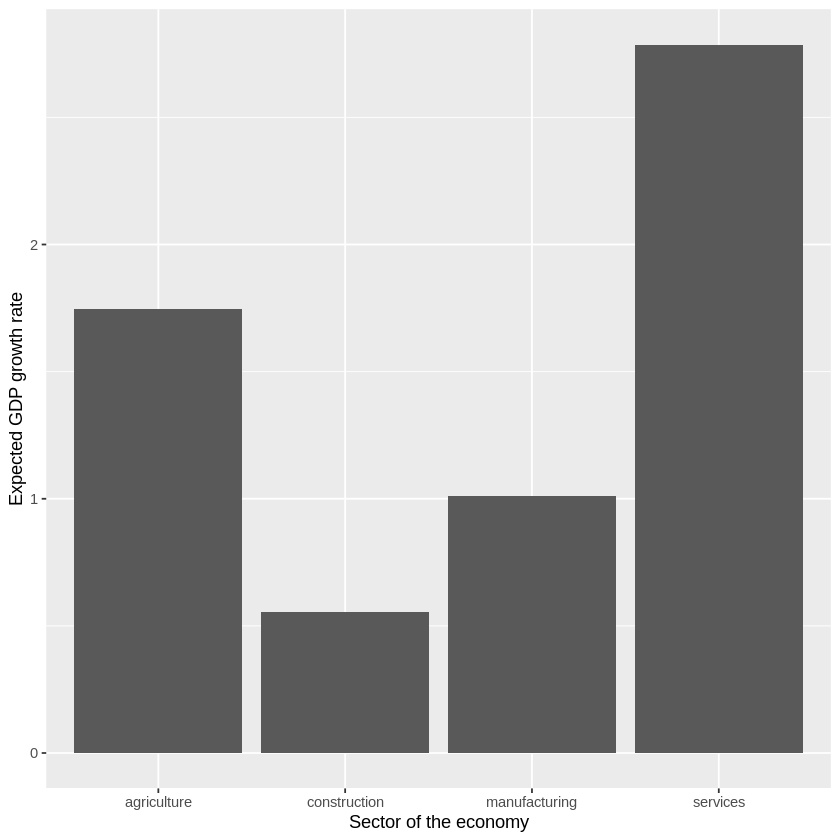

In [436]:
# Your answer here!

# START

averages <- expectations_data %>% 
  group_by(sector) %>% 
  summarise(av_gdp_growth = mean(gdp_growth))

print(averages)

ggplot(averages) +
  geom_col(aes(x = sector, y = av_gdp_growth)) +
  labs(x = "Sector of the economy", y = "Expected GDP growth rate") 

# END  

# Exercise 2: The relationship between class size and student test scores

The Project STAR (for Student-Teacher Achievement Ratio) was designed to determine the effect of smaller class size in the earliest grades on short-term and long-term pupil performance ([source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/10766)). Over 7,000 students in 79 schools across the state of Tennessee were randomly assigned into one of three interventions: small class (13 to 17 students per teacher), regular class (22 to 25 students per teacher), and regular-with-aide class (22 to 25 students with a full-time teacher's aide). Classroom teachers were also randomly assigned to the classes they would teach. The interventions were initiated as the students entered school in kindergarten and continued through third grade. 



In this exercise, we are going to use data from the STAR project to measure the association between school inputs such as classroom size and teacher experience on student achievement in the short and long term.

**1. Upload the Excel file `STAR_data` to Google Colab. How many rows and columns does this dataset have? Examine the first 10 rows of the data.**

In [442]:
library(tidyverse)
library(readxl)

# Your answer here!

# START
star_data <- read_excel(path = "STAR_data.xlsx", sheet = 1)
dim(star_data)
head(star_data,10)

# END  

[1] 11601   379

stdntid,gender,race,birthmonth,birthday,birthyear,FLAGSGK,FLAGSG1,FLAGSG2,FLAGSG3,⋯,hsactcomp,hsacttot,hsactenglish,hsactmath,hsactread,hsactscience,hssatconverted,hsactconverted,hsgrdadd,hsgrdcol
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
10000,M,W,JA,22,1979,N,Y,Y,Y,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10001,M,W,FE,20,1980,Y,N,N,N,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10002,F,B,JU,21,1979,N,N,N,Y,⋯,NA,NA,NA,NA,NA,NA,NA,NA,DROPP,NO
10003,M,W,MA,28,1980,N,Y,Y,Y,⋯,22,89,16,21,28,24,860,22,GRADU,YES
10004,F,B,JA,2,1980,N,N,Y,Y,⋯,NA,NA,NA,NA,NA,NA,NA,NA,DROPP,NO
10005,M,B,JA,1,1980,N,N,Y,Y,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10006,F,B,FE,5,1979,N,N,Y,N,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10007,M,B,MA,15,1980,N,N,N,Y,⋯,NA,NA,NA,NA,NA,NA,NA,NA,GED,NO
10008,F,B,AR,23,1979,N,Y,Y,N,⋯,NA,NA,NA,NA,NA,NA,NA,NA,DROPP,NO


**2. We are interested in studying the association between school inputs such as classroom size and teacher experience during kindergarten on student achievement in the short and long term. Create a dataset that only keeps the relevant variables (stdntid, gender, race, gkschid, gktchid, gkclasstype, gkclasssize, gktyears, gktreadss, gktmathss, gkpresent, hsactenglish, hsactmath, hsactread, hsactscience).**

In [469]:
# Your answer here!

# START

#names(star_data)
star_data_final <- star_data %>%
  select(stdntid,gender,race,gkschid,gktchid,gkclasstype,gkclasssize,gktyears,gktreadss,gktmathss,gkpresent,hsactenglish,hsactmath,hsactread,hsactscience)
head(star_data_final)

# END

stdntid,gender,race,gkschid,gktchid,gkclasstype,gkclasssize,gktyears,gktreadss,gktmathss,gkpresent,hsactenglish,hsactmath,hsactread,hsactscience
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10000,M,W,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10001,M,W,169229,16922904,R,24,5,NA,NA,161,NA,NA,NA,NA
10002,F,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10003,M,W,NA,NA,NA,NA,NA,NA,NA,NA,16,21,28,24
10004,F,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10005,M,B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**3. How many observations with missing values do we have in this dataset? Drop them.**

In [470]:
# Your answer here!

# START

sum(!complete.cases(star_data_final))
star_data_final <- na.omit(star_data_final)
dim(star_data_final)

# END

[1] 9354

[1] 2247   15

**4. Do student test scores in kindergarten predict high school achievement? Plot past and future reading test scores. Differentiate observations by race.**

`geom_smooth()` using formula 'y ~ x'



[1] 0.3703275

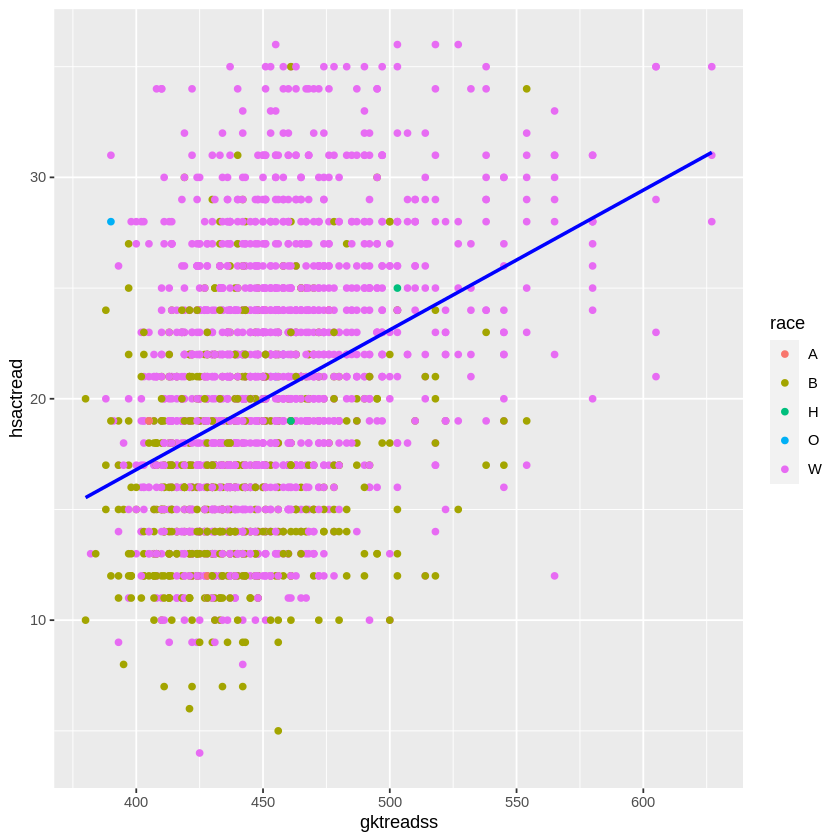

In [515]:
# Your answer here!

# START

# Reading
ggplot(data=star_data_final) +
  geom_point(aes(x=gktreadss, y=hsactread,color=race)) +
  geom_smooth(aes(x=gktreadss,y=hsactread),color='blue',method="lm",se=FALSE) 
cor(star_data_final$gktreadss,star_data_final$hsactread)

# END

**5. Create a dummy for small vs. large classroom and aggregate the data at the teacher level. Do students with more experienced teachers report higher grades in kindergarten?**

`geom_smooth()` using formula 'y ~ x'



[1] 0.1336069

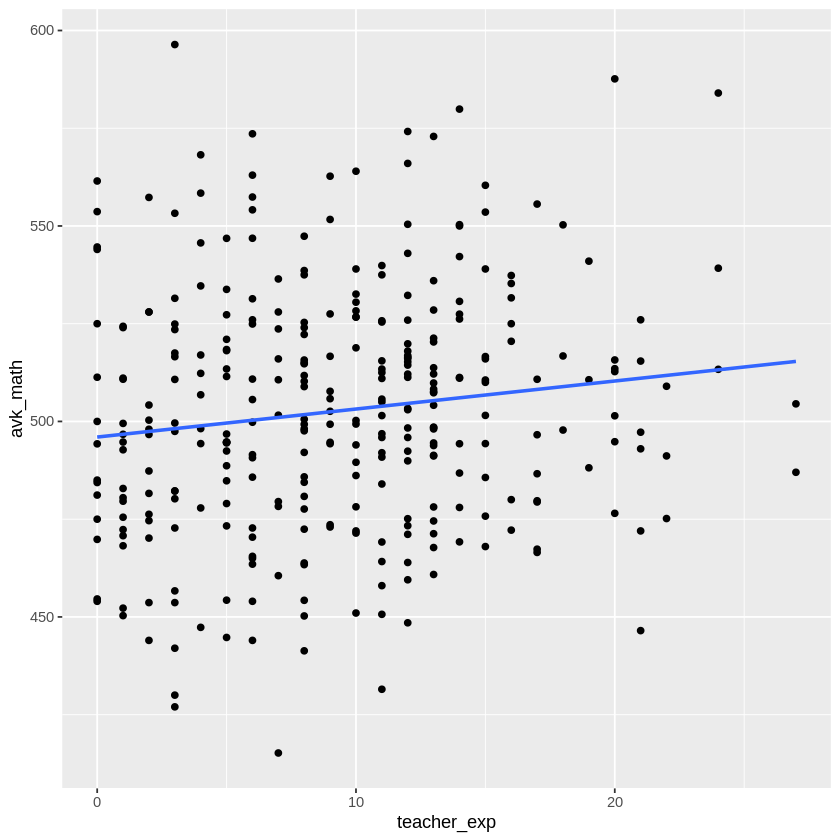

In [514]:
# Your answer here!

# START

star_data_final <- star_data_final %>%
mutate(small = gkclasstype == "S") 

star_data_teacher <- star_data_final %>%
group_by(gktchid) %>%
summarise(small = mean(small), 
          teacher_exp = mean(gktyears),
          avk_math = mean(gktmathss),
          avk_read = mean(gktreadss),
          avhs_math = mean(hsactmath),
          avhs_read = mean(hsactread))

ggplot(star_data_teacher) +
geom_point(aes(x=teacher_exp,y=avk_math)) +
geom_smooth(aes(x=teacher_exp,y=avk_math),method='lm',se=FALSE)

cor(star_data_teacher$teacher_exp,star_data_teacher$avk_math)

# END

**6. Do students from small classrooms report higher test scores in kindergarten? Plot your results.**

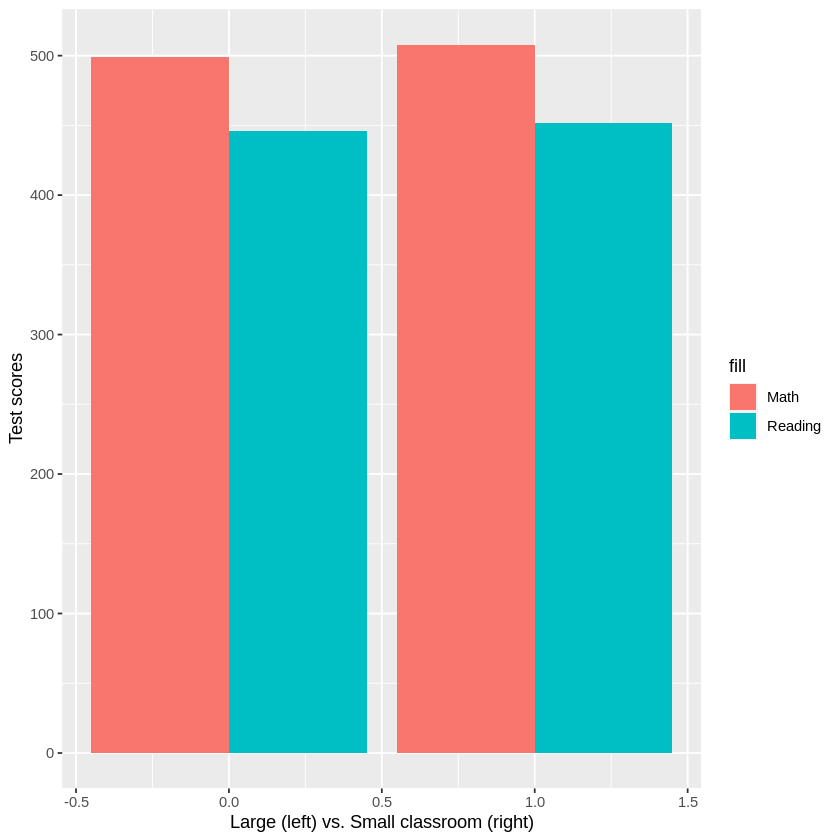

In [509]:
# Your answer here!

# START

averages <- star_data_teacher %>% 
  group_by(small) %>% 
  summarise(avk_math = mean(avk_math),
          avk_read = mean(avk_read))

print(averages)

ggplot(averages) +
  geom_col(aes(x = small, y = avk_math, fill='Math'), 
            width = 0.45, position = position_nudge(x = -0.225)) +
  geom_col(aes(x = small, y = avk_read, fill='Reading'), 
          width = 0.45, position = position_nudge(x = 0.225)) +
  labs(x = "Large (left) vs. Small classroom (right)", y = "Test scores") 

# END  